In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [30]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

# 차원 축소

### 차원의 저주

- 차원 수가 늘어날 수록 알고리즘의 실행이 까다로워지는 일을 일컫는 말이다
- 차원이 증가하면 공간의 부피가 너무 빨리 증가하여 사용 가능한 데이터가 희소해지고, 거리가 멀어진다. >>> ?<br>

정리를 하면
1. 차원이 커질 수록 같은 범위라도 샘플 사이의 거리가 멀어지게 된다.<br>
(값이 0~1인 같은 양의 데이터를 1차원 > 2차원 > 3차원으로 볼 때 그 모습을 생각해보자)
2. 이러면 새로운 샘플이 들어오더라도 예측의 신뢰가 떨어지게 된다 (교재에선 '예측이 불안정해진다'고 표현) <br>
(어찌 보면, 훈련셋에 과대적합됐다 할 수 있다)
3. 때문에 '유사한 속성을 가진 그룹을 형성하는 영역을 만드는 것'이 모델을 만드는 이유 중 하나인데, 샘플이 희소하고 유사하지 않아 효율적인 공통 데이터 구성 전략 구상이 힘들다(=좋은 모델 만들기가 힘들다). (위키피디아 표현)

# 해결 방법

### 1. 투영

실전에선 고차원 공간에 샘플이 골고루 퍼진 모습이 아니고, 몇몇 특성이 서로 강하게 연관되어 있어 저차원 부분 공간으로도 표현할 수 있다는 것 >>> ? <br>
<br>
교재를 예시로 들면, 기울어진 원판 모양의 데이터를 적절한 평면에 투영하는 경우<br>
<br>
한계: 부분 공간이 뒤틀리거나 휘어 있는 경우엔 최선은 아니다 (ex. 스위스 롤)<br>
\>>> 롤을 대충 잘라버리면 원본의 모습을 유츄하기 힘듦. 즉 원본만의 특징을 살려내지 못함

### 2. 매니폴드 학습

매니폴드?  
- d차원 매니폴드는 국부적으로 d차원 초평면으로 보일 수 있는 n차원 공간의 일부 (d < n)
- 쉽게 말하면, n차원 공간을 d차원 부분 공간으로 잘라낸 단면의 모습

차원 축소 알고리즘 중 훈련 샘플이 놓여 있는 매니폴드를 모델링하는 식으로 작동하며 이를 '매니폴드 학습'이라고 한다<br>
이때 대부분 실제 고차원 데이터셋이 더 낮은 저차원 매니폴드에 가깝게 놓여 있다고 가정한다 (>>>매니폴드 가정/가설)<br>
저차원 매니폴드 공간에 표현되면 더 간단해질 것이라고 가정한다. 하지만 항상 좋아지는 것은 아니다.<br>
\>>> 샘플 특성을 무시하고 대충 나누면 오히려 좋지 않을 수도 있다는 말
<br>
훈련 전 훈련 세트의 차원을 감소시키면 훈련 속도는 빨라진다. 하지만 모델의 질이 좋아진다는 말은 아니다

# PCA

훈련 세트에서 분산이 최대인 축을 찾아내 이 축의 평면에 투영하는 방법<br>
평면은 분산을 최대로 보존하는 평면으로 한다

### 분산 보존

분산이 최대로 보존되는 축으로 투영한다면 정보가 가장 적게 손실된다는 아이디어  
~ 원본과 투영 사이의 평균 제곱 거리를 최소화하는 축을 찾자

### 주성분

- i번째 축을 정의하는 단위 백터를 i번째 주성분(Principal Component)이라고 한다<br>
- 주성분을 찾는 방법은 다음과 같다
    1. 훈련 세트에서 분산이 최대인 축을 찾아낸다
    2. 첫 번째 축에 직교하면서, 남은 분산을 최대한 보존하는 두 번째 축을 찾아낸다
    3. 1, 2에서 찾아낸 축에 직교하면서, 남은 분산을 최대한 보존하는 세 번째 축을 찾아낸다
    4. 1 ~ i-1번 축에 직교하면서, 남은 분산을 최대한 보존하는 i번째 축을 찾아낸다

- 주성분은 특잇값 분해로 탐색한다

정리하자면 가장 분산이 큰 축을 찾고, 그 다음은 직교하면서 분산이 큰 축, ... 을 찾는 방법

#### 특이값 분해

- 행렬 $\mathbf X$를 세 개 행렬의 점곱인 $\mathbf U \cdot \Sigma \cdot \mathbf V^T$로 분해하는 방법
- 여기서 찾고자 하는 모든 주성분은 $\mathbf V$에 담겨 있으며 그 모습은 다음과 같다
> $\mathbf V = 
\begin{pmatrix}  
| & | &  &|  \\
\mathbf c_1 & \mathbf c_2 & \cdots & \mathbf c_n \\
| & | &  &| 
\end{pmatrix} $
<br>

여기서
- $\mathbf{c}_1, \mathbf{c}_2 \cdots \mathbf{c}_n$: n번째 주성분
- $U$: $m \times m$ 크기의 유니터리 행렬.
- $\Sigma$: $m \times n$ 크기의, 대각선상에 있는 원소의 값은 음수가 아니며 나머지 원소의 값이 모두 0인 대각행렬.
- $V^*$: $V$의 켤레전치 행렬로, $n \times n$ 유니터리 행렬.

용어
- 유니터리 행렬: 켤레전치가 역행렬과 같은 복소수 정사각 행렬
- 켤레전치
    - 그 행렬의 전치 행렬을 취한 뒤 성분별 켤레 복소수를 취하여 얻는 행렬이다
    - 실수 행렬의 전치 행렬과 복소수의 켤레 복소수의 공통적인 일반화이다
- 켤레 복소수
    - 복소수의 허수부에 덧셈 역원을 취하여 얻는 복소수
    - 즉 편각에 덧셈 역원을 취하여 얻는 복소수
    - ex. 복소수 $z=x+iy$의 켤레복소수 $\bar{z}$는 $\bar{z}=x-iy$

켤레전치 예시
>  만약 <br>
$A = 
\begin{pmatrix}
1 & -2-i \\
1+i & i
\end{pmatrix}
$이라면 <br>
$A^* = 
\begin{pmatrix}
1 & 1-i \\
-2+i & -i
\end{pmatrix}
$이다 <br>

여기서 유니터리 행렬은 $U = A^*=A^{-1}$인 행렬<br>

공분산 행렬의 고유 벡터는 분산이 어느 방향으로 가장 큰지 나타낸다<br>
중앙에 맞춰진 훈련 세트의 공분산 행렬은 
$\mbox{Cov} = {1\over n-1} \mathbf{X}^T \mathbf{X} \\
= {1\over n-1} (\mathbf{U}\Sigma \mathbf{V}^T)^T (\mathbf{U}\Sigma \mathbf{V}^T) \\
= {1\over n-1} (\mathbf{U}^T \Sigma \mathbf{V}) (\mathbf{U}\Sigma \mathbf{V}^T)\\
= {1\over n-1} \mathbf{V}\Sigma^2 \mathbf{V}^T\\
= \mathbf{V} {\Sigma^2 \over n-1} \mathbf{V}^T$ 이다<br>
따라서 $\mathbf{V}$가 공분산 행렬의 고유 벡터이고 주성분이 된다

#### np.linalb.svd()를 이용한 주성분 추출

numpy, scipy의 특이값 분해 결과는 $U, \Sigma, V^*$이므로 진짜 주성분을 확인하려면 $V^*$를 다시 전치해야 한다

In [31]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

c1 = Vt.T[ : , 0]
c2 = Vt.T[ : , 1]

#### X_centered?

- PCA는 데이터셋의 평균이 0이라고 가정한다
- 때문에 sklearn과 같이 내부에서 알아서 데이터의 평균을 0에 맞게 바꾸지 않는 경우 맞춰주는 작업이 필요하다 >>> 평균중심화

평균중심화?
- 데이터의 평균을 구한 뒤 평균을 빼는 방식으로 조정하는 기법
- 다중공선성 문제를 피하기 위한 방법<br>
(다중공선성: 독립변수 간 강한 상관관계가 나타나는 문제를 일컫는 말로, 이는 '독립변수에 따른 종속변수를 예측한다' 라는 회귀분석의 가정 자체를 흔들기 때문에 해결해야 하는 문제다)
- 즉 PCA에서 평균을 0으로 가정하는 이유는 다중공선성 문제를 피하기 위함이라고 할 수 있다

In [37]:
c1, c2

(array([0.93636116, 0.29854881, 0.18465208]),
 array([-0.34027485,  0.90119108,  0.2684542 ]))

In [38]:
X_centered.shape

(60, 3)

In [39]:
U.shape

(60, 60)

In [40]:
s

array([6.77645005, 2.82403671, 0.78116597])

In [41]:
Vt.T, Vt

(array([[ 0.93636116, -0.34027485, -0.08626012],
        [ 0.29854881,  0.90119108, -0.31420255],
        [ 0.18465208,  0.2684542 ,  0.94542898]]),
 array([[ 0.93636116,  0.29854881,  0.18465208],
        [-0.34027485,  0.90119108,  0.2684542 ],
        [-0.08626012, -0.31420255,  0.94542898]]))

### d차원으로 투영하기

d차원으로 축소하기 위해선 찾아낸 주성분에서 처음 d개의 성분을 담은 행렬 $\mathbf W_d$와 행렬 $\mathbf X$를 점곱하면 된다

$\mathbf X_{d\mbox{-proj}} = \mathbf X \cdot \mathbf W_d$

In [43]:
""" 3차원 데이터를 2차원으로 투영하는 모습 (>>> d=2) """

W2 = Vt.T[ : , : 2]
X2D = X_centered.dot(W2)

In [44]:
W2

array([[ 0.93636116, -0.34027485],
       [ 0.29854881,  0.90119108],
       [ 0.18465208,  0.2684542 ]])

In [45]:
X2D.shape

(60, 2)

### 사이킷런으로 구현하는 방법

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

### 설명된 분산의 비율

설명된 분산의 비율?
- 각 주성분의 축을 따라 있는 데이터셋의 분산 비율로, 공분산 행렬의 고윳값이다 (=${\Sigma}^2 \over n-1$)
- 아래 셀의 경우 전체 데이터셋의 분산 중 84%가 첫번째 주성분에 있고, 14%는 두 번째 축, 세번째 축엔 나머지 (~ 1.2%) 미량의 분산이 있다고 볼 수 있다

In [13]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

In [14]:
from sklearn.datasets import load_iris

iris = load_iris()

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [15]:
Xiris = iris["data"]
yiris = iris["target"]

Xiris, yiris

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [16]:
pcairis = PCA(n_components=3)
X2Diris = pcairis.fit_transform(Xiris)

In [17]:
pcairis.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

### 적절한 차원 수 선택

충분한 분산이 될 때 까지 더해야 할 차원 수를 선택하는 것이 바람직하다. (이건 논의해서 정할 몫)<br>
단, 시각화가 목적이라면 2~3차원까지 축소해야 한다

In [20]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1)
X = mnist["data"]
y = mnist["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
""" 
분산이 충분한 최소한의 차원 탐색
방법 1
    일단 PCA 객체를 훈련 셋에 fit한 다음
    설명된 분산의 비율 누적합을 구해
    최초로 원하는 분산에 도달하는 차원 수를 찾아낸 뒤
    찾아낸 차원 수로 PCA 객체 다시 만들기 ( >>> PCA(n_components=d)
"""

pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [22]:
d

154

In [23]:
cumsum

array([0.09746116, 0.16901561, 0.23051091, 0.28454476, 0.3334341 ,
       0.37648637, 0.40926898, 0.4381654 , 0.46574904, 0.48917044,
       0.51023733, 0.53061286, 0.5476835 , 0.5646237 , 0.58045752,
       0.59532097, 0.60851456, 0.6213047 , 0.63317742, 0.64470679,
       0.65536719, 0.66546513, 0.67505665, 0.684153  , 0.69298586,
       0.70137405, 0.70947236, 0.71732954, 0.72473217, 0.73163231,
       0.73819375, 0.74464845, 0.75065664, 0.75651276, 0.7621803 ,
       0.767615  , 0.77266217, 0.77753297, 0.78232252, 0.78699846,
       0.79154214, 0.79599132, 0.80017349, 0.80413513, 0.8079722 ,
       0.81173005, 0.81534432, 0.81883456, 0.82222188, 0.82541884,
       0.82858738, 0.83168883, 0.83465363, 0.83752465, 0.84034978,
       0.84304401, 0.84572793, 0.84829303, 0.85082471, 0.85327119,
       0.85566821, 0.85805402, 0.86034636, 0.86255585, 0.86468645,
       0.86674963, 0.86877744, 0.87072779, 0.8726425 , 0.87452799,
       0.87639775, 0.8781988 , 0.87996667, 0.88170025, 0.88334

In [24]:
"""
방법 2. PCA 객체를 만들 때 원하는 분산을 n_components에서 0 ~ 1 사이의 값으로 지정
"""

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

(0.0, 400.0, 0.0, 1.0)

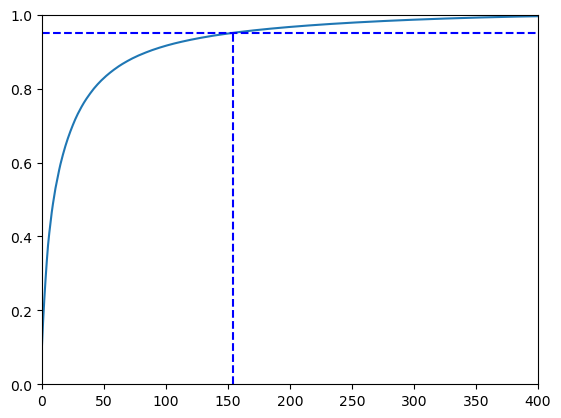

In [25]:
""" 
방법 3. 위에서 구한 cumsum을 그래프로 그려본 뒤 적절해보이는 값으로 선택
"""

plt.plot(cumsum)
plt.plot([d, d], [0, 0.95], "b--")
plt.plot(np.ones(cumsum.size)*0.95, "b--")
plt.axis([0, 400, 0, 1])

### 압축

MNIST의 경우 95%의 분산만 남기고자 한다면 대략 800 차원에서 150 차원으로 감소한다<br>
이는 특성이 800개에서 150개로 감소한다는 것과 같으며 <br>
이를 통해 데이터셋 크기 감소, 속도 향상을 기대할 수 있다<br>

### 복원

원래 차원으로 되돌리려면 변환 과정을 반대로 하면 된다<br>
역변환: $\mathbf X_{\mbox{recovered}} = \mathbf X_{d \mbox{proj}} \cdot W_d^T$  
  
단, 변환 중 정보 일부를 유실했기 때문에 원본과 똑같은 모습으로 복원하는 것은 안된다<br>
(위의 mnist를 예로 들면 95% 분산만 남겼으므로 최소 5%는 유실된 것)
  
이 때 원본과 압축 후 복원을 거친 데이터 사이의 평균 제곱 거리를 재구성 오차라고 함

In [26]:
""" 원본과 압축 후 복원 과정을 거친 데이터의 차이 비교"""

pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

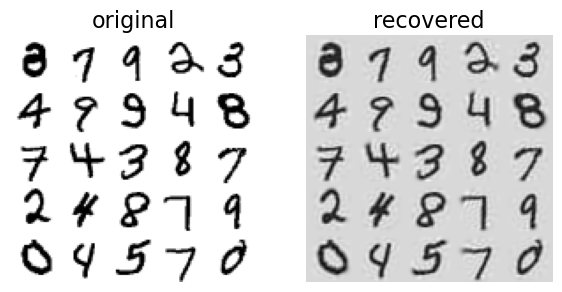

In [27]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100].to_numpy())
plt.title("original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("recovered", fontsize=16)

plt.show()

### 점진적 PCA (Incremental PCA)

- 훈련 세트를 미니 배치로 나눈 뒤 IPCA에 하나씩 주입하는 방식
- naive한 PCA가 전체 훈련 세트를 메모리에 올려야 한다는 것과 차이(~ 배치 학슴)
- 온라인 학습 가능

In [47]:
"""
MNIST를 100개로 나눠 IPCA를 적용하는 모습
*** IPCA의 n_components는 PCA처럼 0~1 사이의 값 사용 불가 >>> 무조건 정수만
"""

from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)

for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

In [30]:
"""
다른 방법: np의 memmap
HDD의 이진 파일에 저장된 배열을 메모리에 들어 있는 것처럼 다루는 방식. ~ 가상메모리
(메모리로 간주하는 범위 = 진짜 메모리 + HDD의 배열 저장 영역)

*** 이 코드는 my_mnist.data가 있어야 정상 작동
"""

filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='w+', shape=(m, n))
X_mm[:] = X_train

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, n_components=154)

### 랜덤 PCA

확률적인 알고리즘으로, 첫 $d$개의 주성분에 대한 근사값을 빠르게 찾는다  
  
PCA의 계산복잡도: $\mathbf{\mathit O}(m\times n^2) + \mathbf{\mathit O}(n^3)$  
랜덤 PCA의 계산복잡도: $\mathbf{\mathit O}(m\times d^2) + \mathbf{\mathit O}(d^3)$  
  
\>>> $d$가 $n$보다 많이 작다면 일반 알고리즘보다 빠르다(즉, 특성 수 < 샘플 수일 때)

In [48]:
""" 랜덤 PCA 구현 예시: PCA 객체의 svd_solver 옵션을 'randomized'로 지정 """

rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)

# 커널 PCA

#### 갑자기 커널?

- 커널은 변환을 하지 않거나, 변환 방법을 모르더라도 변환한 두 벡터의 점곱을 알아낼 수 있는 함수이다.
- SVM에서 특성 수를 늘리는 것과 같은 효과를 보기 위해 커널을 썼던 것처럼 (>>> 커널 트릭)<br>
차원 축소를 하기 위해 PCA에 커널을 활용하여 고차원 데이터를 낮은 차원의 비선형 형태의 투영으로 바꾸는 것이다
- 투영된 후에 샘플의 군집을 유지하거나 꼬인 매니폴드에 가까운 데이터셋을 펼칠 때도 유용하다

In [49]:
""" 커널 PCA 구현: 가우시안 커널을 사용할 경우"""

from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import KernelPCA

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)
X

array([[-3.29677117,  4.26198454,  7.69787682],
       [ 5.95972743, 11.45784273, 12.72625276],
       [ 6.66051523, 18.15820401, -9.84713337],
       ...,
       [ 6.18364276,  1.44095323, -1.71242696],
       [ 5.86076169,  1.09185823, 12.47091112],
       [-8.16213703,  5.61235668,  4.51171684]])

In [50]:
X_reduced

array([[-0.20318153, -0.04192012],
       [-0.12291985, -0.08891651],
       [ 0.06294914, -0.06770846],
       ...,
       [-0.01755176,  0.50273796],
       [-0.09990453,  0.00253754],
       [-0.19161337, -0.0417062 ]])

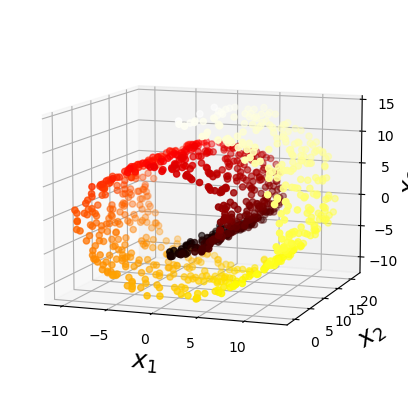

In [51]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18, labelpad=7)
ax.set_ylabel("$x_2$", fontsize=18, labelpad=7)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

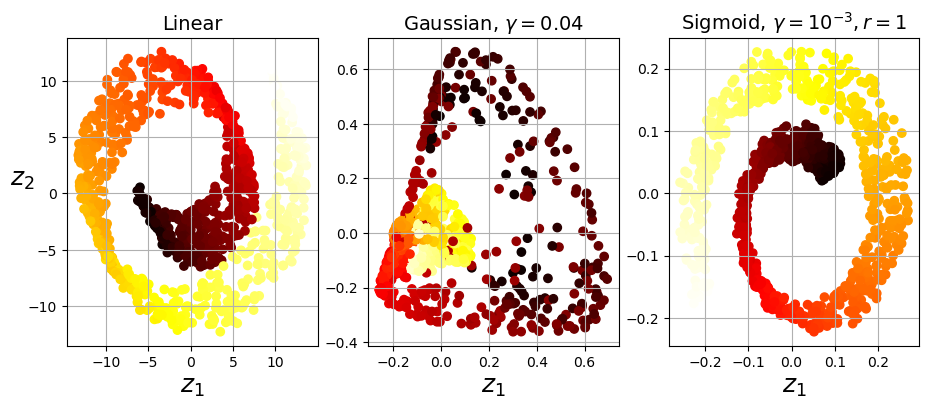

In [52]:
lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear"), (132, rbf_pca, "Gaussian, $\gamma=0.04$"), (133, sig_pca, "Sigmoid, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

### 커널 선택, 하이퍼파라미터 튜닝

중요: kPCA는 비지도 학습이라 명확한 성능 측정 기준이 없다  

#### 방법 1. 그리트서치로 성능이 제일 좋은 파라미터 조합 사용

In [53]:
"""
그리드 탐색을 사용하여 찾아내는 모습.
"""

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [54]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


#### 방법 2. 가장 낮은 재구성 오차를 만드는 커널, 하이퍼파라미터 사용

교재 설명을 정리하자면
1. kPCA를 사용한 결과는 (무한 차원으로 확장 + 선형 PCA로 목표 차원까지 감소) 결과와 같다
2. 이러면 kPCA 결과를 원본 차원으로 역변환하기위해 PCA와 똑같이 했을 때 무한 차원으로 구성된다<br>
즉 역변환 결과의 차수 != 원본 차수가 된다
3. 때문에 원본 차수로 되돌리고, 원본과 얼마나 비슷한지 비교하려면 다음과 같이 한다
    1. 무한 차원으로 확장하는건 같다
    2. 1의 결과물을 목표 차수가 아닌, 원본의 차수로 매핑한다. 이 작업으로 얻은 3차원 매핑 결과를 재구성 원상이라고 한다
    3. 재구성 원상과 원본 사이의 오차를 비교한다. 여기서 재구성 원상과 원본 사이의 오차를 재구성 오차라고 한다
4. 재구성 오차를 최소화하는 파라미터 조합을 찾기 위해 그리드서치를 할 수 있다


In [55]:
"""
재구성 예시
sklearn에선 PCA의 fit_inverse_transform=True면 inverse_transform(축소결과)로 재구성 가능
이를 계속 그리드 탐색해서 최적의 커널, 하이퍼파라미터를 탐색하는 방법이 있다
"""
from sklearn.metrics import mean_squared_error

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)

X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

mean_squared_error(X, X_preimage)

32.7863087957661

# LLE: 지역 선형 임베딩

이것도 비선형 차원 축소 (~비선형 커널) <br>
각 훈련 샘플이 가장 가까운 이웃과 얼마나 선형적으로 연관되어 있는지 측정한 뒤<br>
그 관계가 가장 잘 보존되는 훈련 세트의 저차원 표현을 찾는 방식 <br>
잡음이 너무 낳지 않은 경우 꼬인 매니폴드를 펼칠 때 좋음 <br>
<br>
상세<br>
1. 각 훈련 샘플 $\mathbf x^\left( i \right )$에 대해 가장 가까운 k개의 샘플을 찾아낸다 <br>
다시 말해, $\mathbf x^\left( i \right )$와 $\sum_{j=1}^m (w_\left(i,j\right)\mathbf x^\left(j\right))$ 사이의 제곱 거리가 최소가 되는 $w_\left(i,j\right)$를 찾아낸다 <br>
이 때 <br>
&nbsp;&nbsp; 조건 1. $\mathbf x^\left( j \right )$가 $\mathbf x^\left( i \right )$의 이웃 k개 중 하나가 아니면 $w_\left(i,j\right)=0$ <br>
&nbsp;&nbsp; 조건 2. $\sum_{j=1}^m (w_\left(i,j\right)) = 1$ >>> 가중치 정규화<br>
1의 결과: $\hat{\mathbf W} = argmin_{\mathbf w} \sum_{i=1}^m \left( \mathbf x^\left( i \right ) - \sum_{j=1}^m (w_\left(i,j\right)\mathbf x^\left(j\right))\right)^2$<br>
2. 1의 관계가 보존되도록 훈련 샘플을 $d$차원 공간으로 매핑<br>
여기서 가중치는 고정하고 저차원 공간에서 샘플 이미지의 최적 위치, 다시 말해 $d$차원 공간으로 매핑된 $\mathbf x^\left( i \right )$의 결과 $\mathbf z^\left( i \right )$와 $\sum_{j=1}^m \hat{w}_\left(i,j\right)\mathbf z^\left( j \right )$ 사이의 최소 거리를 찾아낸다<br>
2의 결과: $\mathbf Z = argmin_{\mathbf z} \sum_{i=1}^m \left( \mathbf z^\left( i \right ) - \sum_{j=1}^m (\hat{w}_\left(i,j\right)\mathbf z^\left(j\right))\right)^2$


LLE 계산복잡도 <br>
1. k개 인접 이웃 탐색: $\mathit{\mathbf O} (m \log(m)n\log(k))$
2. 가중치 최적화: $\mathit{\mathbf O} (mnk^3)$
3. 저차원 표현 생성: $\mathit{\mathbf O} (dm^2)$ <br>
*** 훈련셋에 대해 제곱만큼 증가하기 때문에 대량의 데이터셋에서는 힘들다

# 다른 차원축소 기법

- 다차원 스케일링(MDS): 샘플 간의 거리를 보존하면서 차원을 축소하는 기법
- isomap: 각 샘플을 가장 가까운 이웃과 연결하는 식으로 그래프를 만든 다음, 지오데식 거리(두 노드 사이의 최단 경로를 이루는 노드의 수)를 유지하면서 차원을 축소하는 기법
- t-SNE: 비슷한 샘플은 가까이, 아닌 샘플은 멀리 떨어지도록 축소하는 기법
- 선형 판별 분석(LDA): 클래스 사이를 가장 잘 구분하는 초평면을 정의하는데 사용할 수 있는 방법